In [1]:
!nvidia-smi

Wed Aug  7 02:24:29 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.183.01             Driver Version: 535.183.01   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA RTX A6000               Off | 00000000:01:00.0 Off |                  Off |
| 30%   34C    P8              24W / 300W |      1MiB / 49140MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os 
os.environ['CUDA_VISIBLE_DEVICES'] = '1'

# Visualize the debiasing results

## Load the debiasing results

In [3]:
# File paths
crows_results_dir = '../results/crows_SentenceDebias'
stereoset_results_dir = '../results/stereoset_SentenceDebias_processed'

before_debias_crows_results_dir = '../results/crows'
before_debias_stereoset_results_dir = '../results/stereoset_processed'

In [4]:
import os
import json

crows_results = {'llama2': {},
                     'gpt2': {},
                     'phi2': {}}

for file in os.listdir(crows_results_dir):
    if file.endswith('.json'):
        category = 'gender' if 'gender' in file.lower() else 'race' if 'race-color' in file.lower() else 'religion'
        model = 'llama2' if 'llama2' in file.lower() else 'gpt2' if 'gpt2' in file.lower() else 'phi2'
        
        with open(os.path.join(crows_results_dir, file), 'r') as f:
            results = json.load(f)
            crows_results[model][category] = results[category if category != 'race' else 'race-color']
            
            
stereoset_results = {'llama2': {},
                     'gpt2': {},
                     'phi2': {}}

for file in os.listdir(stereoset_results_dir):
    if file.endswith('.json'):
        category = 'gender' if 'gender' in file.lower() else 'race' if 'race-color' in file.lower() else 'religion'
        model = 'llama2' if 'llama2' in file.lower() else 'gpt2' if 'gpt2' in file.lower() else 'phi2'
        
        with open(os.path.join(stereoset_results_dir, file), 'r') as f:
            results = json.load(f)
            stereoset_results[model][category] = results[file[:-5]]['intrasentence'][category]

In [5]:
print("StereoSet Results (SentenceDebias) :")
print(json.dumps(stereoset_results, indent=2))

StereoSet Results (SentenceDebias) :
{
  "llama2": {
    "religion": {
      "Count": 741.0,
      "LM Score": 88.68102308344552,
      "SS Score": 61.00692852330475,
      "ICAT Score": 69.15890943438505
    },
    "race": {
      "Count": 8928.0,
      "LM Score": 88.67722593108384,
      "SS Score": 64.04820838375029,
      "ICAT Score": 63.76210295562842
    },
    "gender": {
      "Count": 2313.0,
      "LM Score": 88.08089143906234,
      "SS Score": 65.27484644753511,
      "ICAT Score": 61.172449605188596
    }
  },
  "gpt2": {
    "race": {
      "Count": 8928.0,
      "LM Score": 91.08090498316676,
      "SS Score": 55.93203141259572,
      "ICAT Score": 80.27500919421094
    },
    "religion": {
      "Count": 741.0,
      "LM Score": 90.38623622265942,
      "SS Score": 59.624808626786134,
      "ICAT Score": 72.98723169988779
    },
    "gender": {
      "Count": 2313.0,
      "LM Score": 83.70535211313573,
      "SS Score": 56.30133696148189,
      "ICAT Score": 73.15623

In [6]:
print("CrowS-Pairs Results (SentenceDebias) :")
print(json.dumps(crows_results, indent=2))

CrowS-Pairs Results (SentenceDebias) :
{
  "llama2": {
    "race": {
      "Anti-stereotype score": 41.86,
      "Metric score": 67.25,
      "Num. neutral": 0.0,
      "Stereotype score": 69.56,
      "Total examples": 516
    },
    "gender": {
      "Anti-stereotype score": 75.73,
      "Metric score": 57.25,
      "Num. neutral": 0.0,
      "Stereotype score": 45.28,
      "Total examples": 262
    },
    "religion": {
      "Anti-stereotype score": 83.33,
      "Metric score": 74.29,
      "Num. neutral": 0.0,
      "Stereotype score": 73.74,
      "Total examples": 105
    }
  },
  "gpt2": {
    "religion": {
      "Anti-stereotype score": 83.33,
      "Metric score": 36.19,
      "Num. neutral": 0.0,
      "Stereotype score": 33.33,
      "Total examples": 105
    },
    "race": {
      "Anti-stereotype score": 62.79,
      "Metric score": 55.23,
      "Num. neutral": 0.0,
      "Stereotype score": 54.55,
      "Total examples": 516
    },
    "gender": {
      "Anti-stereotype 

# Load original results

In [7]:
# Load original results
# Crows
with open(f'{before_debias_crows_results_dir}/crows_m-GPT2LMHeadModel_c-gpt2.json', 'r') as f:
    gpt2_before_crows_results = json.load(f)
with open(f'{before_debias_crows_results_dir}/crows_m-PhiForCausalLM_c-microsoft_phi-2.json', 'r') as f:
    phi2_before_crows_results = json.load(f)
with open(f'{before_debias_crows_results_dir}/crows_m-LlamaForCausalLM_c-meta-llama_Llama-2-7b-hf.json', 'r') as f:
    llama2_before_crows_results = json.load(f)
    
# Combine into 1 dict
before_crows_results = {'gpt2': gpt2_before_crows_results,
                        'phi2': phi2_before_crows_results,
                        'llama2': llama2_before_crows_results}
    
# Stereoset
with open(f'{before_debias_stereoset_results_dir}/stereoset_m-GPT2LMHeadModel_c-gpt2_s-42.json', 'r') as f:
    gpt2_before_stereoset_results = json.load(f)
with open(f'{before_debias_stereoset_results_dir}/stereoset_m-LlamaForCausalLM_c-meta-llama_Llama-2-7b-hf_s-42.json', 'r') as f:
    llama2_before_stereoset_results = json.load(f)
with open(f'{before_debias_stereoset_results_dir}/stereoset_m-PhiForCausalLM_c-microsoft_phi-2_s-42.json', 'r') as f:
    phi2_before_stereoset_results = json.load(f)
    
# Combine into 1 dict
before_stereoset_results = {'gpt2': gpt2_before_stereoset_results[list(gpt2_before_stereoset_results.keys())[0]]['intrasentence'],
                            'phi2': phi2_before_stereoset_results[list(phi2_before_stereoset_results.keys())[0]]['intrasentence'],
                            'llama2': llama2_before_stereoset_results[list(llama2_before_stereoset_results.keys())[0]]['intrasentence']}

def filter_categories(data, categories):
    return {
        model: {
            category: values
            for category, values in model_data.items()
            if category in categories
        }
        for model, model_data in data.items()
    }
# Filter the dictionary
before_stereoset_results = filter_categories(before_stereoset_results, ['gender', 'race', 'religion'])
before_crows_results = filter_categories(before_crows_results, ['gender', 'race-color', 'religion'])

In [8]:
print("StereoSet Results (Original) :")
print(json.dumps(before_stereoset_results, indent=2))

StereoSet Results (Original) :
{
  "gpt2": {
    "gender": {
      "Count": 2313.0,
      "LM Score": 91.90575853431928,
      "SS Score": 61.87616432191645,
      "ICAT Score": 70.07600072464027
    },
    "race": {
      "Count": 8928.0,
      "LM Score": 90.90172918499442,
      "SS Score": 57.888534652230234,
      "ICAT Score": 76.56010037252489
    },
    "religion": {
      "Count": 741.0,
      "LM Score": 91.55720056412184,
      "SS Score": 64.4699417502532,
      "ICAT Score": 65.06065338453999
    }
  },
  "phi2": {
    "gender": {
      "Count": 2313.0,
      "LM Score": 91.6716883640172,
      "SS Score": 68.80683140688139,
      "ICAT Score": 57.19060860709237
    },
    "race": {
      "Count": 8928.0,
      "LM Score": 92.44955694926966,
      "SS Score": 61.92097162788231,
      "ICAT Score": 70.407786041219
    },
    "religion": {
      "Count": 741.0,
      "LM Score": 92.49399819477682,
      "SS Score": 69.66071631440559,
      "ICAT Score": 56.124033008923824
  

In [9]:
print("CrowS-Pairs Results (Original) :")
print(json.dumps(before_crows_results, indent=2))

CrowS-Pairs Results (Original) :
{
  "gpt2": {
    "gender": {
      "Anti-stereotype score": 58.25,
      "Metric score": 54.96,
      "Num. neutral": 0.0,
      "Stereotype score": 52.83,
      "Total examples": 262
    },
    "race-color": {
      "Anti-stereotype score": 60.47,
      "Metric score": 57.95,
      "Num. neutral": 0.19,
      "Stereotype score": 57.84,
      "Total examples": 516
    },
    "religion": {
      "Anti-stereotype score": 66.67,
      "Metric score": 63.81,
      "Num. neutral": 0.0,
      "Stereotype score": 63.64,
      "Total examples": 105
    }
  },
  "phi2": {
    "gender": {
      "Anti-stereotype score": 50.49,
      "Metric score": 61.07,
      "Num. neutral": 0.0,
      "Stereotype score": 67.92,
      "Total examples": 262
    },
    "race-color": {
      "Anti-stereotype score": 55.81,
      "Metric score": 61.43,
      "Num. neutral": 0.0,
      "Stereotype score": 61.95,
      "Total examples": 516
    },
    "religion": {
      "Anti-stereo

# Visualize stereoset results

In [10]:
import matplotlib.pyplot as plt
import numpy as np

def generate_stereotype_score_chart(original_results, debiased_results):
    categories = ['gender', 'race', 'religion']
    models = ['gpt2', 'phi2', 'llama2']

    x = np.arange(len(categories))
    width = 0.1  # Adjusted width to accommodate all bars

    fig, ax = plt.subplots(figsize=(14, 6))
    
    colors = ['#1f77b4', '#2ca02c', '#9467bd']  # Distinct color for each model
    
    for i, (model, color) in enumerate(zip(models, colors)):
        original_scores = [original_results[model][cat]['SS Score'] for cat in categories]
        debiased_scores = [debiased_results[model][cat]['SS Score'] for cat in categories]
        
        # Adjust bar positions
        orig_x = x + (2*i - 3) * width
        deb_x = x + (2*i - 2) * width
        
        orig_bars = ax.bar(orig_x, original_scores, width, label=f'{model} Original', color=color)
        deb_bars = ax.bar(deb_x, debiased_scores, width, label=f'{model} Debiased', 
                          color=color, alpha=0.6, hatch='//')

        # Add value labels on top of each bar
        ax.bar_label(orig_bars, fmt='%.2f', padding=3, fontsize=8)
        ax.bar_label(deb_bars, fmt='%.2f', padding=3, fontsize=8)

    ax.set_ylabel('Stereotype Score (SS)')
    ax.set_title('Stereotype Score Comparison: Original vs Debiased')
    ax.set_xticks(x)
    ax.set_xticklabels(categories)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.set_ylim(50, 70)

    # Add gridlines for better readability
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()
    # Save the plot
    fig.savefig('media/sentence_debias/stereoset_all_models.png')

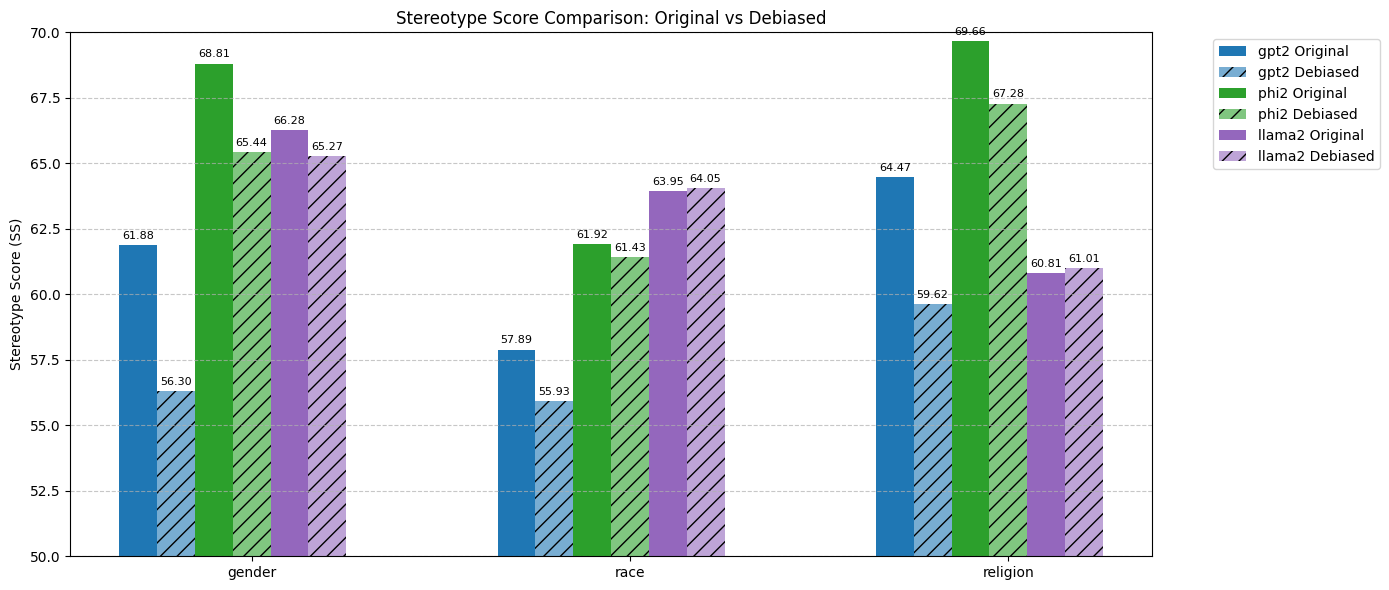

In [11]:
generate_stereotype_score_chart(before_stereoset_results, stereoset_results)

# CrowS pairs results

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def generate_crows_pairs_chart(original_results, debiased_results):
    categories = ['gender', 'race-color', 'religion']
    models = ['gpt2', 'phi2', 'llama2']

    x = np.arange(len(categories))
    width = 0.1  # Adjusted width to accommodate all bars

    fig, ax = plt.subplots(figsize=(14, 6))
    
    colors = ['#1f77b4', '#2ca02c', '#9467bd']  # Distinct color for each model
    
    for i, (model, color) in enumerate(zip(models, colors)):
        original_scores = [original_results[model][cat]['Stereotype score'] for cat in categories]
        debiased_scores = [debiased_results[model][cat.replace('-color', '')]['Stereotype score'] for cat in categories]
        
        # Adjust bar positions
        orig_x = x + (2*i - 3) * width
        deb_x = x + (2*i - 2) * width
        
        orig_bars = ax.bar(orig_x, original_scores, width, label=f'{model} Original', color=color)
        deb_bars = ax.bar(deb_x, debiased_scores, width, label=f'{model} Debiased', 
                          color=color, alpha=0.6, hatch='//')

        # Add value labels on top of each bar
        ax.bar_label(orig_bars, fmt='%.2f', padding=3, fontsize=8)
        ax.bar_label(deb_bars, fmt='%.2f', padding=3, fontsize=8)

    ax.set_ylabel('Stereotype Score')
    ax.set_title('CrowS-Pairs Stereotype Score Comparison: Original vs Debiased')
    ax.set_xticks(x)
    ax.set_xticklabels(categories)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.set_ylim(30, 85)

    # Add gridlines for better readability
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()
    # Save the plot
    fig.savefig('media/sentence_debias/crows_all_models.png')

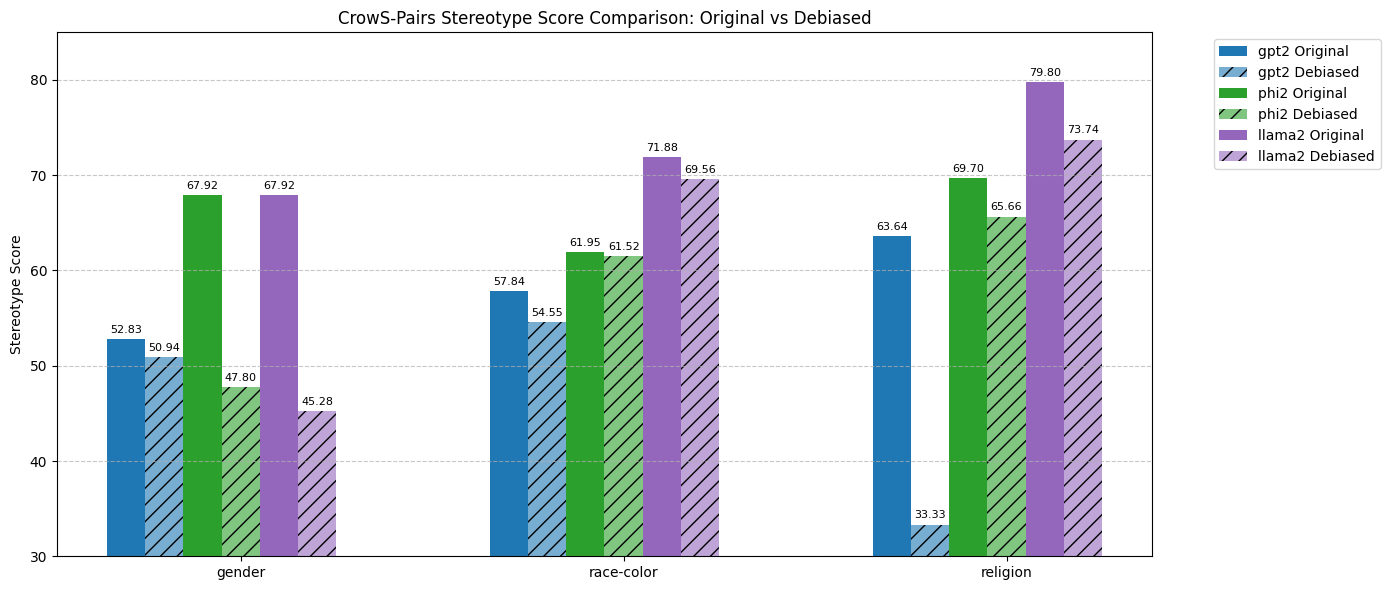

In [13]:
generate_crows_pairs_chart(before_crows_results, crows_results)

# Visualize the debiasing results all in radar chart

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Data processing function
def process_data(crows_original, stereoset_original, crows_debiased, stereoset_debiased):
    processed_data = {}
    models = ['gpt2', 'phi2', 'llama2']
    categories = ['gender', 'race', 'religion']

    for model in models:
        original_scores = []
        debiased_scores = []

        for category in categories:
            # StereoSet data
            original_scores.append(stereoset_original[model][category]['SS Score'])
            debiased_scores.append(stereoset_debiased[model][category]['SS Score'])

            # CrowS-Pairs data (note: 'race-color' in CrowS is equivalent to 'race' in StereoSet)
            crows_category = 'race-color' if category == 'race' else category
            original_scores.append(crows_original[model][crows_category]['Stereotype score'])
            debiased_scores.append(crows_debiased[model][category]['Stereotype score'])

        processed_data[f'{model} Original'] = original_scores
        processed_data[f'{model} Debiased'] = debiased_scores

    return processed_data

# Radar chart function
def radar_chart(data, categories, title):
    num_vars = len(categories)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # complete the circle

    fig, ax = plt.subplots(figsize=(12, 10), subplot_kw=dict(projection='polar'))
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    plt.xticks(angles[:-1], categories)

    for label, scores in data.items():
        values = scores + scores[:1]
        linestyle = '--' if 'Debiased' in label else '-'
        ax.plot(angles, values, 'o-', linewidth=2, linestyle=linestyle, label=label)
        ax.fill(angles, values, alpha=0.25)

    ax.set_ylim(30, 90)
    plt.title(title, size=20, y=1.1)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

    return fig, ax

/tmp/ipykernel_733123/2607598881.py:44: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(angles, values, 'o-', linewidth=2, linestyle=linestyle, label=label)


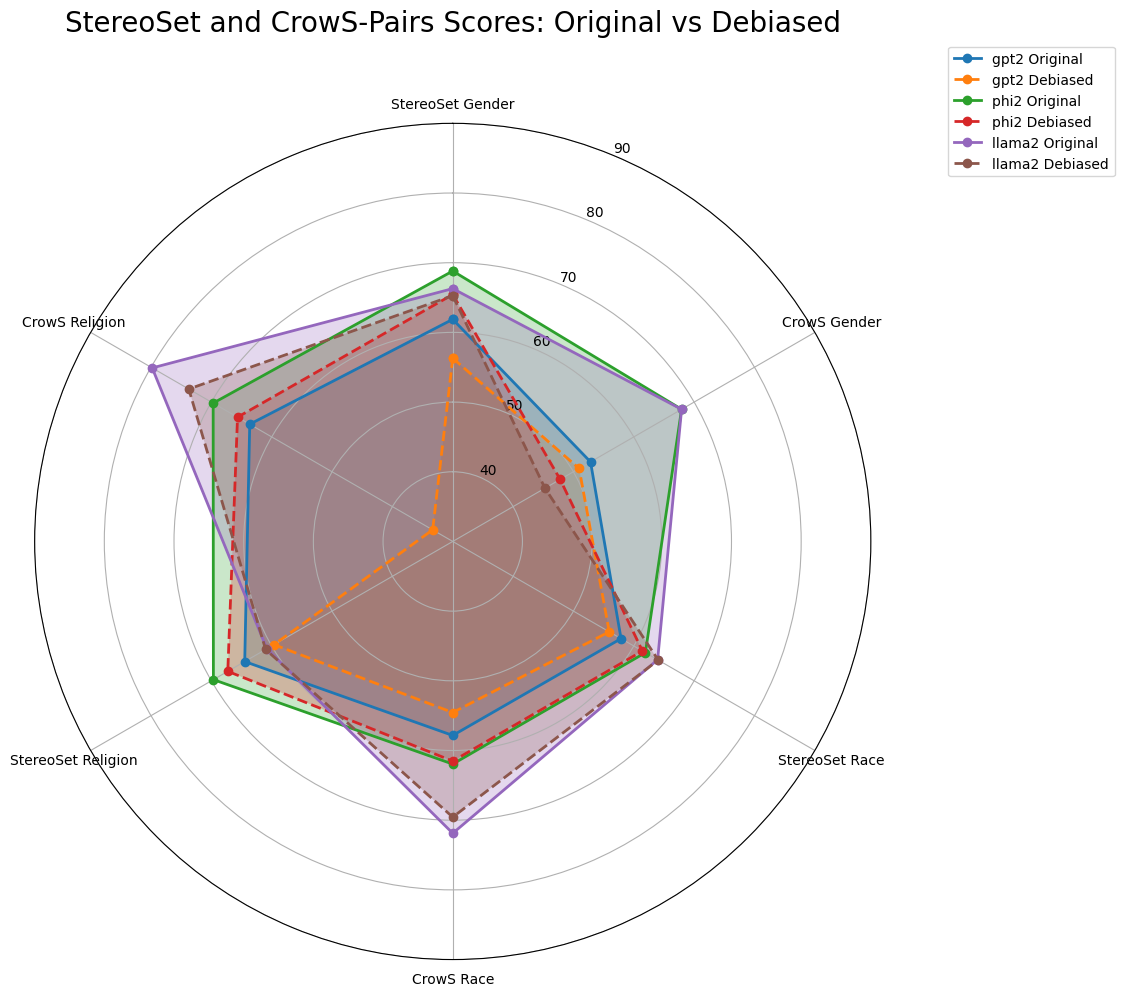

In [15]:
# Process the data
processed_data = process_data(before_crows_results, before_stereoset_results, crows_results, stereoset_results)

# Define categories for the radar chart
categories = ['StereoSet Gender', 'CrowS Gender', 
          'StereoSet Race', 'CrowS Race', 
          'StereoSet Religion', 'CrowS Religion']

# Create the plot
fig, ax = radar_chart(processed_data, categories, "StereoSet and CrowS-Pairs Scores: Original vs Debiased")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()
# Save the plot
fig.savefig('media/sentence_debias/all_models_radar_chart.png')